In [1]:
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from cellpose import models
from cellpose.io import imread

In [2]:
path = "Y:/Data/Lucie/MEN/MEN029/MEN029_PDC_MVP001/Images_Corrected/"
segpath = "Y:/Data/Lucie/MEN/MEN029/MEN029_PDC_MVP001/Measurements/CLS_20X_5Ch_solid_tumour_LK_v02/Segmentation_images/"
import os
os.environ["CELLPOSE_LOCAL_MODELS_PATH"] = "/PATH_FOR_MODELS/"

In [3]:
unique_images = set()

for file in os.listdir(path):
    if file.endswith('.tiff'):
        imname = file.split('-')[0]
        unique_images.add(imname)

unique_images = sorted(unique_images)


In [4]:
print(unique_images)

['r01c01f01p01', 'r01c01f02p01', 'r01c01f03p01', 'r01c01f04p01', 'r01c01f05p01', 'r01c01f06p01', 'r01c01f07p01', 'r01c01f08p01', 'r01c01f09p01', 'r01c01f10p01', 'r01c01f11p01', 'r01c01f12p01', 'r01c01f13p01', 'r01c01f14p01', 'r01c01f15p01', 'r01c01f16p01', 'r01c01f17p01', 'r01c01f18p01', 'r01c01f19p01', 'r01c01f20p01', 'r01c01f21p01', 'r01c01f22p01', 'r01c01f23p01', 'r01c01f24p01', 'r01c01f25p01', 'r01c02f01p01', 'r01c02f02p01', 'r01c02f03p01', 'r01c02f04p01', 'r01c02f05p01', 'r01c02f06p01', 'r01c02f07p01', 'r01c02f08p01', 'r01c02f09p01', 'r01c02f10p01', 'r01c02f11p01', 'r01c02f12p01', 'r01c02f13p01', 'r01c02f14p01', 'r01c02f15p01', 'r01c02f16p01', 'r01c02f17p01', 'r01c02f18p01', 'r01c02f19p01', 'r01c02f20p01', 'r01c02f21p01', 'r01c02f22p01', 'r01c02f23p01', 'r01c02f24p01', 'r01c02f25p01', 'r01c03f01p01', 'r01c03f02p01', 'r01c03f03p01', 'r01c03f04p01', 'r01c03f05p01', 'r01c03f06p01', 'r01c03f07p01', 'r01c03f08p01', 'r01c03f09p01', 'r01c03f10p01', 'r01c03f11p01', 'r01c03f12p01', 'r01c03

In [5]:
# Initialize an empty list to store the channel data
multi_channel_images = {}

unique_names_short = unique_images[0:25]

# Iterate through the channel names
for image_name in unique_names_short:
    # Use a wildcard character (*) to match any number at the end of the filename
    image_pattern = os.path.join(path, f'{image_name}*.tiff')
    seg_pattern = os.path.join(segpath, f'{image_name}*.png')
    # Get a list of files that match the pattern
    image_files = glob.glob(image_pattern)
    image_files = sorted(image_files)
    seg_files = glob.glob(seg_pattern)
    seg_files = sorted(seg_files)
    channel_data = []

    for multi in image_files:
        # Read the first matching file (you can modify this logic to read multiple files if needed)
        channel_image = tf.imread(multi)
        channel_data.append(channel_image)

    for segs in seg_files:
        seg_image = imread(segs)
        seg_image = seg_image  # Reshape to (2160, 2160)
        channel_data.append(seg_image)
    
    if channel_data:
        multi_channel_image = np.stack(channel_data, axis=-1)
        channel_order = [4,0,3,2,1,5] # this is hardcoded but reflect exactly how we have the channels in scDINO and other parts of our image analysis!
        multi_channel_image = multi_channel_image[...,channel_order]
    
    multi_channel_images[image_name] = multi_channel_image


In [ ]:
print(multi_channel_images['r01c01f02p01'])

[[[ 196  233  128  120  127    0]
  [ 176  233  132  114  124    0]
  [ 170  251  119  120  138    0]
  ...
  [ 185 5277  104  108  130    0]
  [ 174 5407  108  115  119    0]
  [ 166 5132  103  122  122    0]]

 [[ 166  236  114  130  137    0]
  [ 179  219  116  127  142    0]
  [ 172  225  110  118  110    0]
  ...
  [ 153 5269  114  113  155    0]
  [ 179 5300  111  115  125    0]
  [ 147 5062  127  112  138    0]]

 [[ 176  247  118  109  131    0]
  [ 193  242  104  122  122    0]
  [ 162  269  106  128  107    0]
  ...
  [ 179 5385  126  137  119    0]
  [ 186 5234  114  121  110    0]
  [ 167 5177  106  120  131    0]]

 ...

 [[ 161 6174  112  131  133    0]
  [ 167 5870  115  143  135    0]
  [ 165 5977  111  136  114    0]
  ...
  [ 166 6317  119  134  115    0]
  [ 123 6549  100  125  126    0]
  [ 151 6383  107  124  116    0]]

 [[ 154 5759   80  135  135    0]
  [ 131 5907  118  121  139    0]
  [ 161 5999  105  126  146    0]
  ...
  [ 121 6389   97  121  114    0]
  [ 

In [22]:
multi_channel_image = multi_channel_images['r01c01f24p01']

In [7]:
# Initialize Cellpose model for nucleus and cell segmentation
from cellpose import models
nucleus_model = models.CellposeModel(gpu=True, model_type='nuclei')
cell_model = models.CellposeModel(gpu=True, model_type='cyto3')



d:\Python\cellpose2\lib\site-packages\cellpose\resnet_torch.py:276: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_location=device)


In [53]:
# Perform nucleus segmentation
X = np.log(multi_channel_image[..., 2])
x01 = np.percentile(X, 2)
x99 = np.percentile(X, 98)
X = (X - x01) / (x99 - x01)

nucleus_masks, flow_nucleus, styles_nucleus = nucleus_model.eval(X, flow_threshold=0, diameter=None)

cell_masks, flow_cell, styles_cell  = nucleus_model.eval(X, diameter=None, flow_threshold=0)

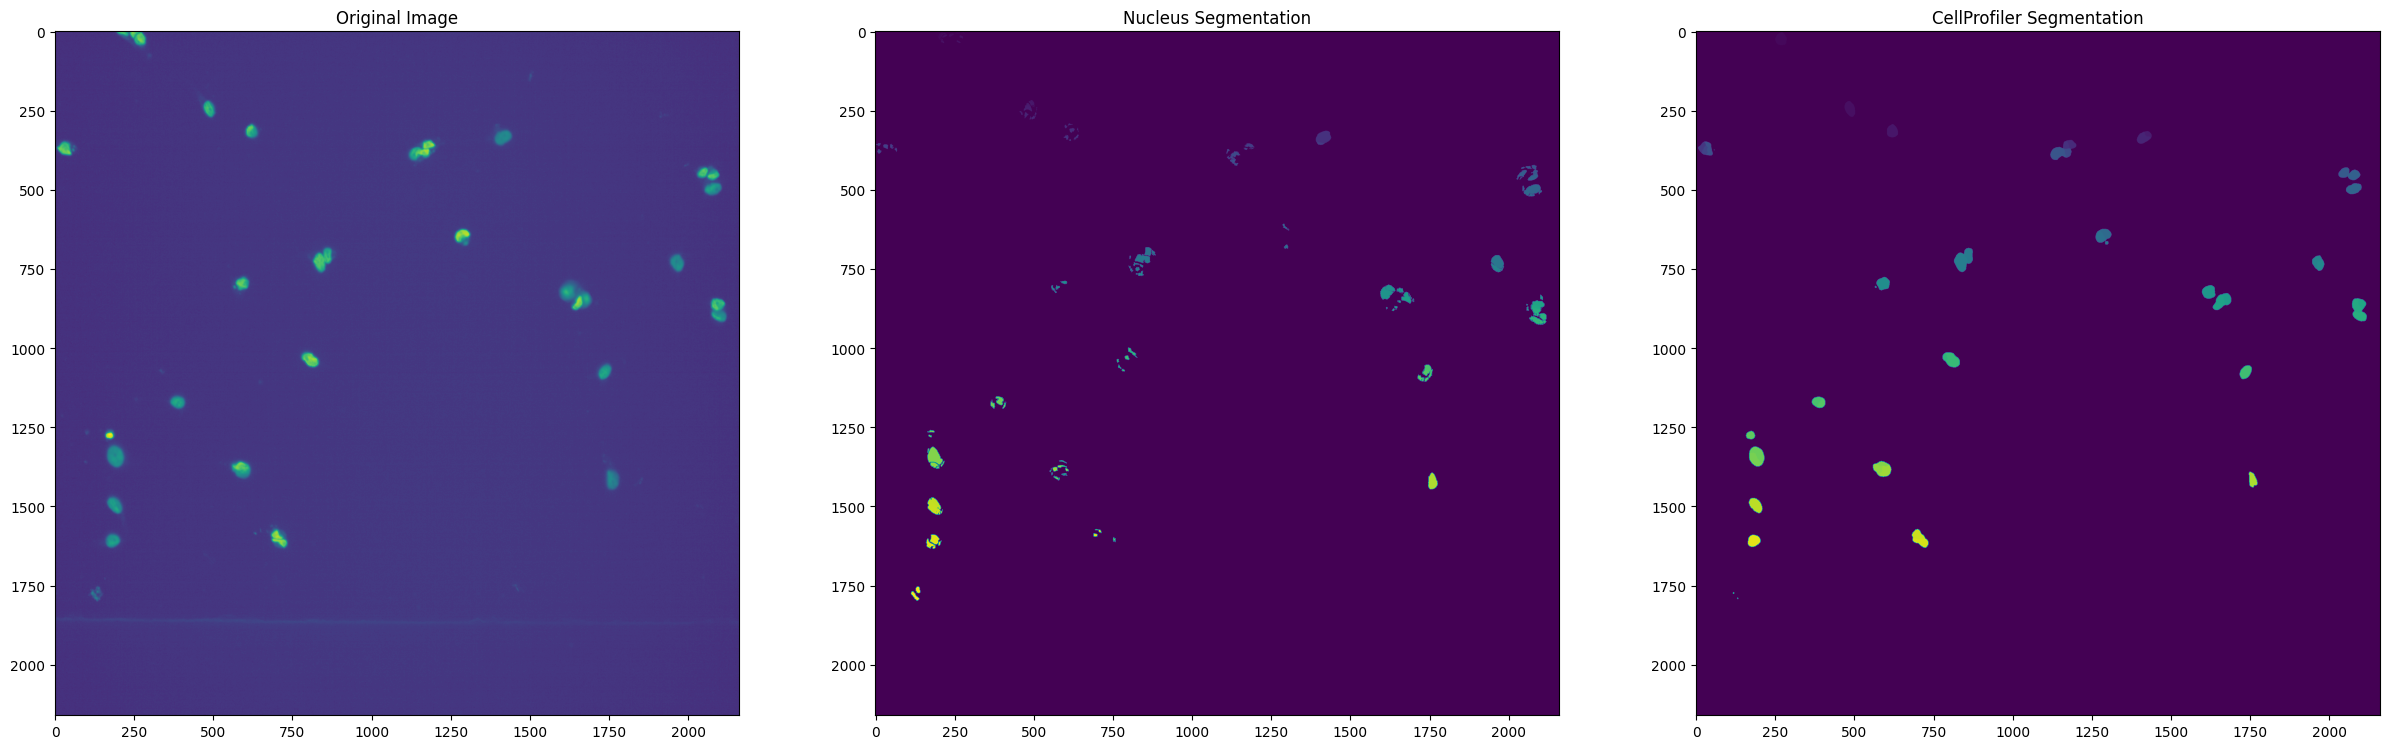

In [54]:
# Display the original image, nucleus segmentation, and cell segmentation side by side
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Original image
axes[0].imshow(X, cmap='viridis')
axes[0].set_title('Original Image')

# Nucleus segmentation
axes[1].imshow(cell_masks, cmap='viridis')
axes[1].set_title('Nucleus Segmentation')

# Nucleus segmentation
axes[2].imshow(multi_channel_image[...,5], cmap='viridis')
axes[2].set_title('CellProfiler Segmentation')

plt.show()

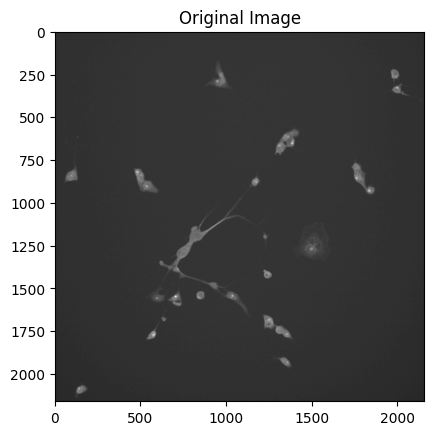

In [14]:
image_test =  multi_channel_image[..., 0]*5

image_test = image_test.astype(float)  # Convert to float data type
image_test = image_test**0.1 # Apply the square root operation
image_test = image_test*100
image_test = image_test + multi_channel_image[...,2]**0.3

image_test_stacked = np.stack([image_test,multi_channel_image[...,2]], axis=-1)


# Display the image
plt.imshow(image_test_stacked[...,0], cmap='gray')
plt.title('Original Image')
plt.show()

In [154]:
cell_masks, flow_cell, styles_cell  = cell_model.eval(image_test_stacked,channels=[[1,2]], diameter=120, flow_threshold=0.5, cellprob_threshold=-5)

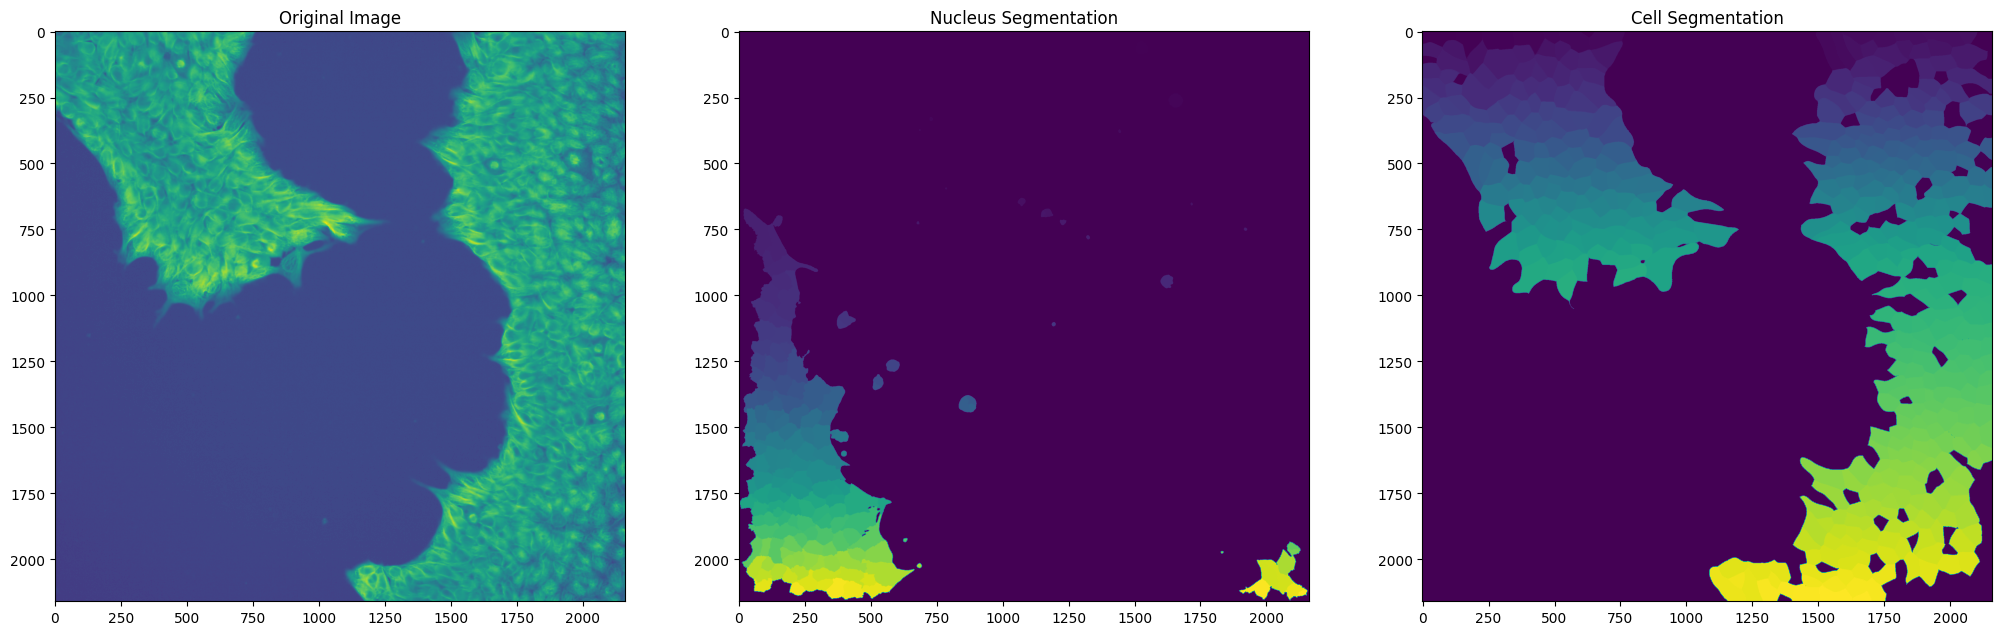

In [155]:
# Display the original image, nucleus segmentation, and cell segmentation side by side
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Original image
axes[0].imshow(image_test_stacked[...,0], cmap='viridis')
axes[0].set_title('Original Image')

# Nucleus segmentation
axes[1].imshow(multi_channel_image[...,5], cmap='viridis')
axes[1].set_title('Nucleus Segmentation')

# Nucleus segmentation
axes[2].imshow(cell_masks, cmap='viridis')
axes[2].set_title('Cell Segmentation')

plt.show()